<a href="https://colab.research.google.com/github/damianmtz98/Datos_Masivos_MCD/blob/main/ProyectoFinalAvance_DatosMasivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Avance Proyecto Final** / Prediccion de tipo de cambio del Dólar (USD)

 Nuestro objetivo principal es crear un modelo que nos ayude a predecir el tipo de cambio del dólar (USD), teniendo en cuenta diferentes índices, valor de otras monedas respecto al dólar, tambien el precio del oro y petróleo.
 El tipo de cambio afecta en mucho la economía mundial y el dólar es una moneda dominante, este proyecto nos ayudaría para tomar medidas o decisiones economicas para evitar que nos afecte y en el mejor de los casos obtener un beneficio.

 Las variables a considerar son las siguientes:



*   USD/MXN: Precio dólar a peso mexicano.
*   USD/EUR: Precio dólar a euro.
*   USD/JPY: Precio dólar a yen.
*   OIL: Precio del petróleo.
*   GOLD: Precio oro.
*   S&P500: Índice bursátil.
*   DowJones: Índice bursátil.
*   TasaDesempleoUSA: Tasa de desempleo en USA.

Todos estos datos son sacados de Yahoo Finance, y son de los últimos 5 años.












A continuación realizaremos un ánalisis exploratorio de los datos.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv("usdmxn.csv")
df.head(15)

,Date,USD/MXN,USD/EUR,USD/JPY,Oil,Gold,S&P500,DowJones,TasaDesempleoUSA
0,16/07/2018,19.01,1.17,111.43,75.35,1977.5,4565.72,35061.21,3.9
1,23/07/2018,18.61,1.17,111.04,75.42,1960.1,4505.42,34509.03,3.9
2,30/07/2018,18.54,1.16,111.26,73.86,1926.2,4398.95,33734.88,3.9
3,06/08/2018,18.90,1.14,110.87,70.64,1921.1,4450.38,34407.60,3.9
4,13/08/2018,18.88,1.15,110.49,69.16,1919.1,4348.33,33727.43,3.9
5,20/08/2018,19.01,1.16,111.37,71.78,1958.4,4409.59,34299.12,3.9
6,27/08/2018,19.07,1.16,111.04,70.17,1962.2,4298.86,33876.78,3.9
7,03/09/2018,19.31,1.16,111.00,71.74,1952.4,4282.37,33762.76,3.7
8,10/09/2018,18.83,1.16,112.01,72.67,1944.1,4205.45,33093.34,3.7
9,17/09/2018,18.81,1.18,112.56,71.55,1978.7,4191.98,33426.63,3.7


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              263 non-null    object 
 1   USD/MXN           263 non-null    float64
 2   USD/EUR           263 non-null    float64
 3   USD/JPY           263 non-null    float64
 4   Oil               262 non-null    float64
 5   Gold              263 non-null    float64
 6   S&P500            263 non-null    float64
 7   DowJones          263 non-null    float64
 8   TasaDesempleoUSA  263 non-null    float64
dtypes: float64(8), object(1)
memory usage: 18.6+ KB


In [60]:
df.shape

#Observamos que tenemos 263 datos y 9 columnas.

(263, 9)

In [61]:

df = df.drop(columns=['Date'])
df.head()

#Quitamos la columna 'Date' porque no se tomara en cuenta.

,USD/MXN,USD/EUR,USD/JPY,Oil,Gold,S&P500,DowJones,TasaDesempleoUSA
0,19.01,1.17,111.43,75.35,1977.5,4565.72,35061.21,3.9
1,18.61,1.17,111.04,75.42,1960.1,4505.42,34509.03,3.9
2,18.54,1.16,111.26,73.86,1926.2,4398.95,33734.88,3.9
3,18.90,1.14,110.87,70.64,1921.1,4450.38,34407.60,3.9
4,18.88,1.15,110.49,69.16,1919.1,4348.33,33727.43,3.9


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   USD/MXN           263 non-null    float64
 1   USD/EUR           263 non-null    float64
 2   USD/JPY           263 non-null    float64
 3   Oil               262 non-null    float64
 4   Gold              263 non-null    float64
 5   S&P500            263 non-null    float64
 6   DowJones          263 non-null    float64
 7   TasaDesempleoUSA  263 non-null    float64
dtypes: float64(8)
memory usage: 16.6 KB


In [63]:
df.shape

#Confirmamos que ya no se tome en cuenta la columna 'Date'

(263, 8)

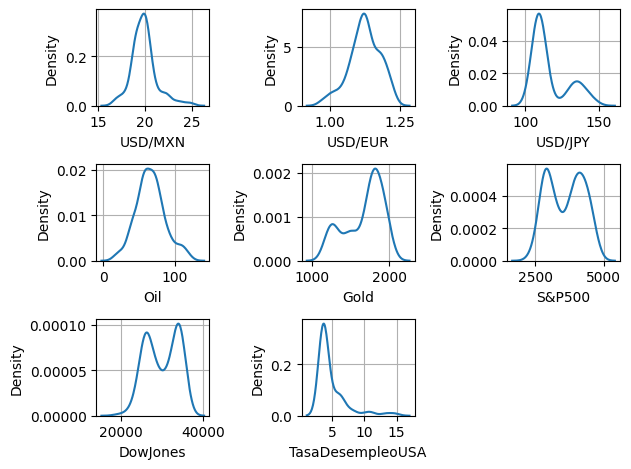

In [64]:
# Utilzamos la KDE, para poder visualizar que distribucíon siguen nuestras variables.

r=3
c=3
it=1
for i in df:
    plt.subplot(r,c,it)
    sns.kdeplot(x = df.loc[:,i], data = df)
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

A simple vista podemos observar que nuestras variables USD/MXN, USD/EUR y OIL siguen una distribución normal, la variable TasaDesempleoUSA pareciera que también pude seguir la misma distribución.

Respecto a nuestras variables restantes siguen una distribución binomial en este caso son	USD/JPY, Gold,	S&P500,	DowJones.

Tambien notamos que:

*   USD/MXN tiene la mayor densidad entre los 20 pesos.
*   En la tasa de desempleo en USA su mayor densidad ronda entre el 3 y 4 por ciento.
*   USD/JPY tiene una mayor densidad en el precio 110 y otra muy baja que esta entre 130 y 140.




In [65]:
#Realizamos la matriz de correlación para saber como se relacionan las variables entre sí.

matriz_correlacion = df.corr()

In [66]:
matriz_correlacion

,USD/MXN,USD/EUR,USD/JPY,Oil,Gold,S&P500,DowJones,TasaDesempleoUSA
USD/MXN,1.000000,0.115111,-0.399975,-0.130282,0.320374,0.330666,0.313462,0.724969
USD/EUR,0.115111,1.000000,-0.765115,-0.187318,0.665446,0.349425,0.280017,0.309904
USD/JPY,-0.399975,-0.765115,1.000000,-0.217841,-0.880792,-0.736590,-0.665180,-0.409217
Oil,-0.130282,-0.187318,-0.217841,1.000000,0.251647,0.618258,0.657634,-0.076170
Gold,0.320374,0.665446,-0.880792,0.251647,1.000000,0.774284,0.702287,0.298183
S&P500,0.330666,0.349425,-0.736590,0.618258,0.774284,1.000000,0.979900,0.390140
DowJones,0.313462,0.280017,-0.665180,0.657634,0.702287,0.979900,1.000000,0.368149
TasaDesempleoUSA,0.724969,0.309904,-0.409217,-0.076170,0.298183,0.390140,0.368149,1.000000


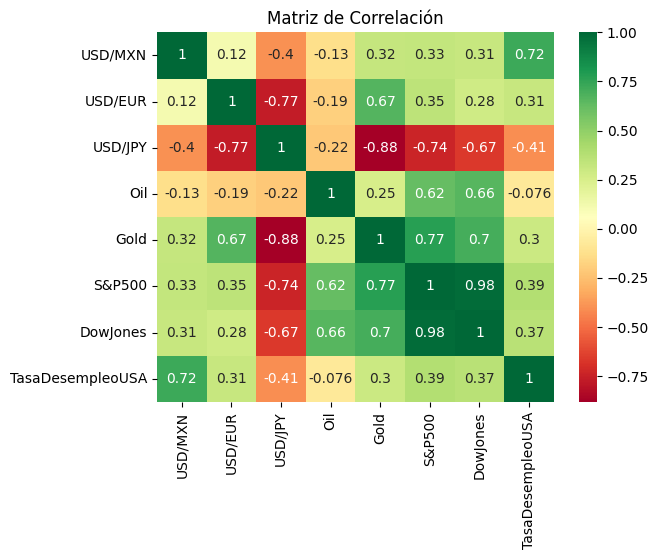

In [53]:
#Mostramos el mapa de calor de la matriz de correlación.

sns.heatmap(matriz_correlacion, annot=True, cmap='RdYlGn')
plt.title('Matriz de Correlación')
plt.show()


* La tasa de desempleo en USA y el precio del USD/MXN tienen una correlacion positiva y esto significa que si una aumenta la otra igual. También estas dos tienen una correlación positiva con el oro y los índices S&P500 y Dow Jones aunque esta relación es debil y se puede decir que se pueden influenciar un poco entre sí.

* USD/JPY tiene una relación negativa con todas las demas variables, esto quiere decir que si los demas suben de precio, USD/JPY baja.

* Los índices S&P500 y Dow Jones siguen una correlación positiva con todas las demás variables excepto USD/JPY, el USD/MXN y USD/EUR siguen una relacion positiva pero debil con estos dos índices en comparación con el petróleo y el oro que tienen una correlación positiva con mas del 0.60. Concluyendo este punto podemos decir que estos índices van de la mano con los precios de nuestras variables.
